In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_csv("dataset/dataset_enso.csv", parse_dates=["acq_date"])

In [3]:
# set index Date
dataset = dataset.set_index("acq_date")

In [4]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(dataset))

In [5]:
# convert numpy array to dataframe
scaled = pd.DataFrame(scaled, columns=["hotspot", "sst_std", "sst_anom", "oni_std", "oni_anom", "soi_std", "soi_anom"])

In [6]:
scaled.head()

,hotspot,sst_std,sst_anom,oni_std,oni_anom,soi_std,soi_anom
0,-1.000000,-0.632385,-0.614849,-0.586854,-0.551402,0.366667,0.36
1,-0.999723,-0.470460,-0.522042,-0.408451,-0.476636,0.600000,0.60
2,-0.999030,-0.172867,-0.433875,-0.173709,-0.439252,0.333333,0.34
3,-0.997644,-0.006565,-0.522042,0.056338,-0.392523,0.100000,0.10
4,-0.995012,0.072210,-0.475638,0.169014,-0.350467,-0.133333,-0.12


- 1. Scatter Plot

In [7]:
# function scatter plot
def scatter(data, x, y, title):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y)

  # set labels
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

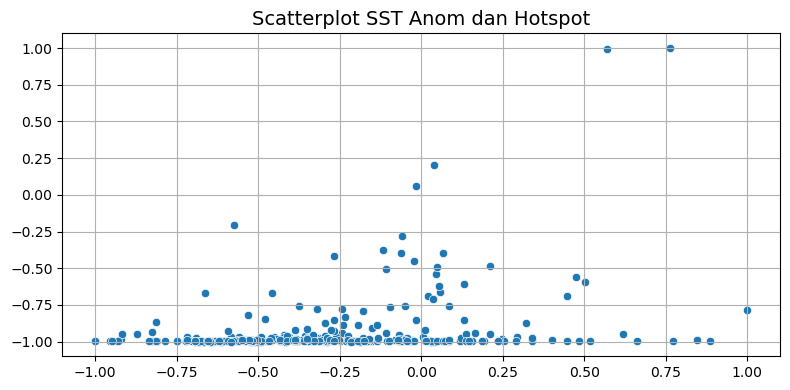

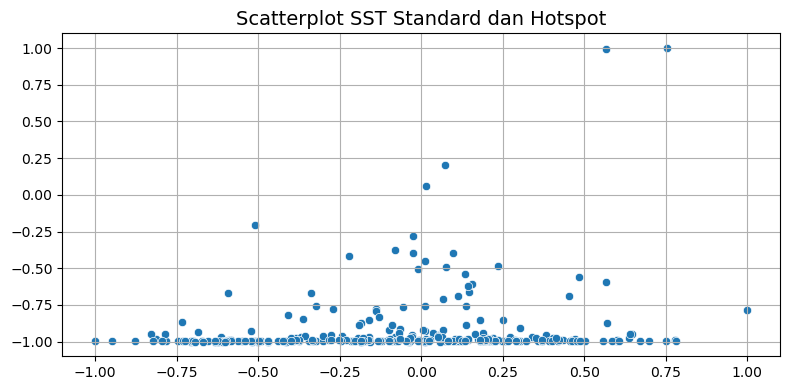

In [8]:
# hotspot dan SST Nino 3.4
scatter(
  data=scaled, x="sst_anom", y="hotspot",
  title="Scatterplot SST Anom dan Hotspot"
)

# hotspot dan SST Nino 3.4
scatter(
  data=scaled, x="sst_std", y="hotspot",
  title="Scatterplot SST Standard dan Hotspot"
)

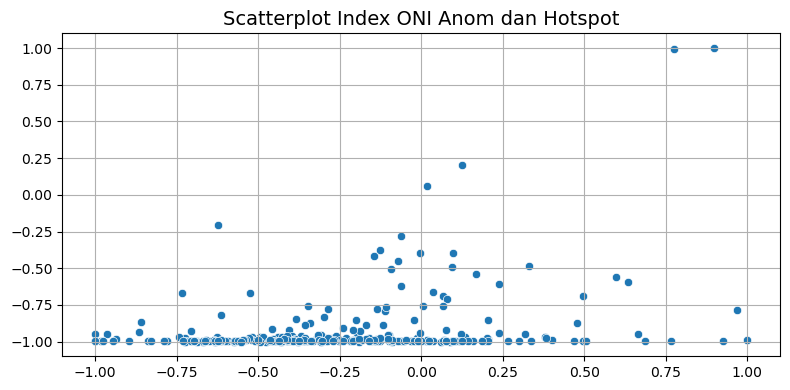

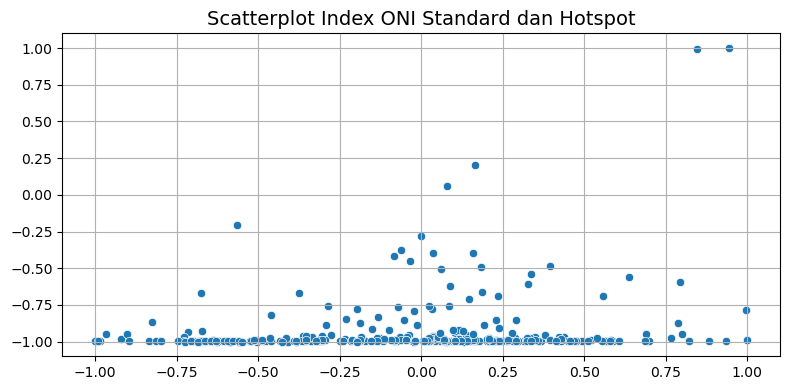

In [9]:
# hotspot dan Index ONI
scatter(
  data=scaled, x="oni_anom", y="hotspot",
  title="Scatterplot Index ONI Anom dan Hotspot"
)

# hotspot dan Index ONI
scatter(
  data=scaled, x="oni_std", y="hotspot",
  title="Scatterplot Index ONI Standard dan Hotspot"
)

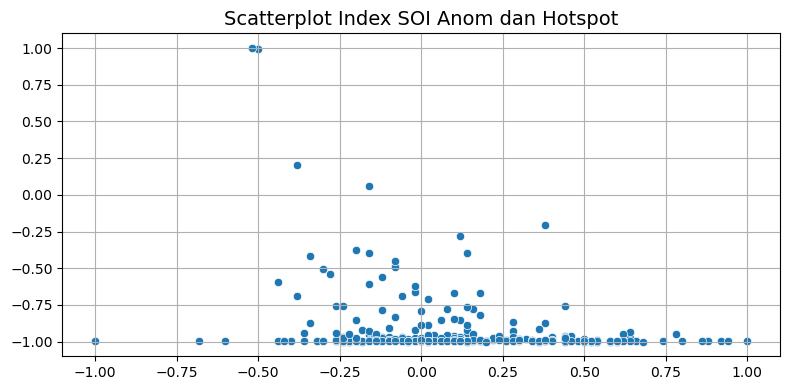

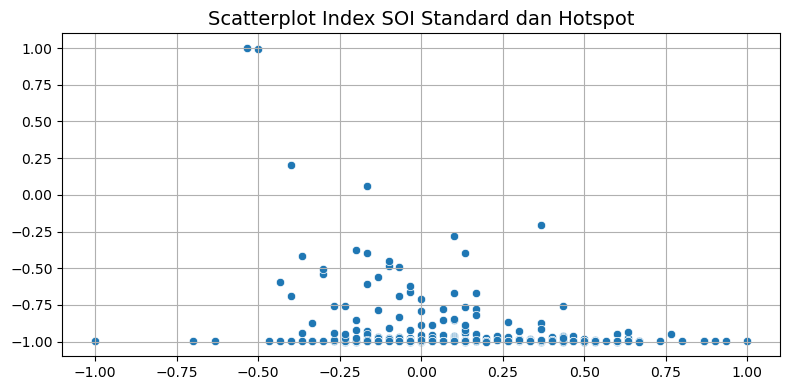

In [10]:
# hotspot dan Index SOI
scatter(
  data=scaled, x="soi_anom", y="hotspot",
  title="Scatterplot Index SOI Anom dan Hotspot"
)

# hotspot dan Index SOI
scatter(
  data=scaled, x="soi_std", y="hotspot",
  title="Scatterplot Index SOI Standard dan Hotspot"
)

2. Histogram

In [11]:
# function histogram,
def histogram(data, x, title):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.kdeplot(data=data, x=x, fill=True, ax=ax)

  # set labels
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

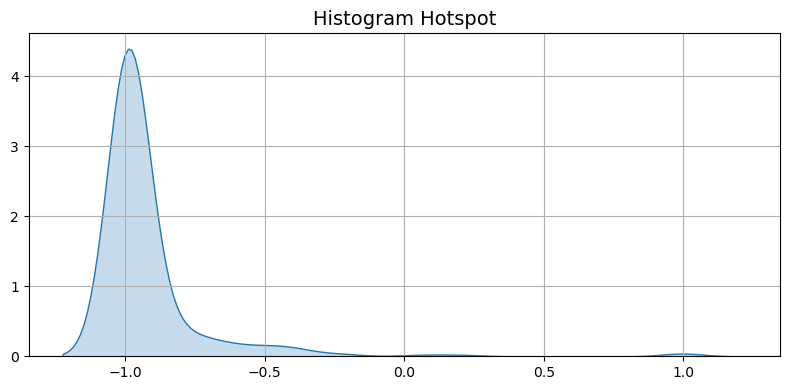

In [12]:
# histogram hotspot
histogram(
  data=scaled, x="hotspot",
  title="Histogram Hotspot"
)

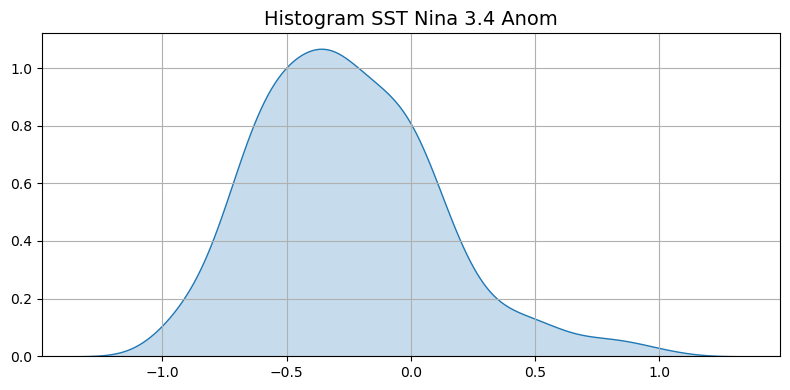

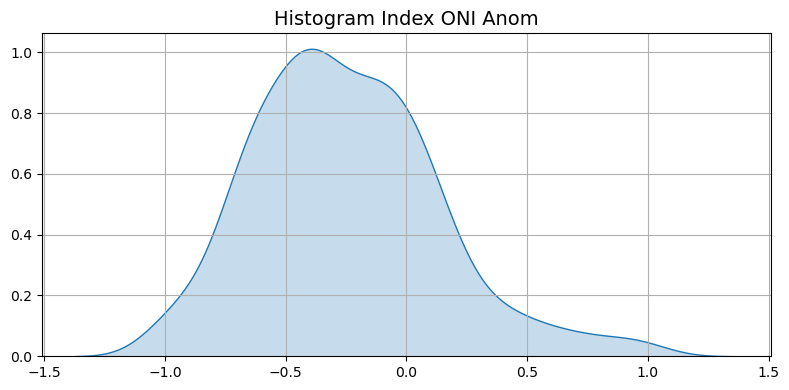

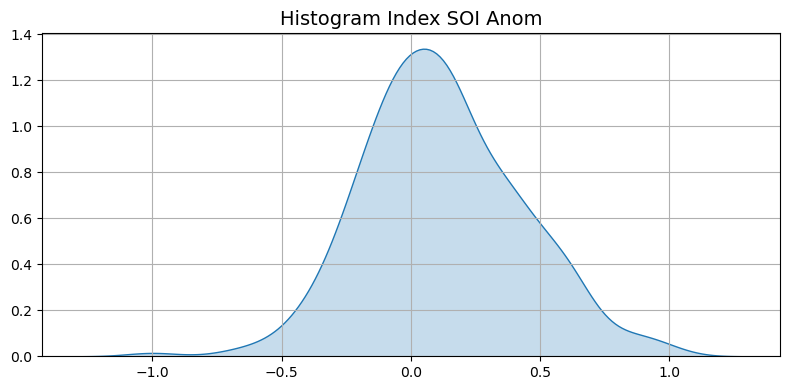

In [13]:
histogram(
  data=scaled, x="sst_anom",
  title="Histogram SST Nina 3.4 Anom"
)

histogram(
  data=scaled, x="oni_anom",
  title="Histogram Index ONI Anom"
)

histogram(
  data=scaled, x="soi_anom",
  title="Histogram Index SOI Anom"
)

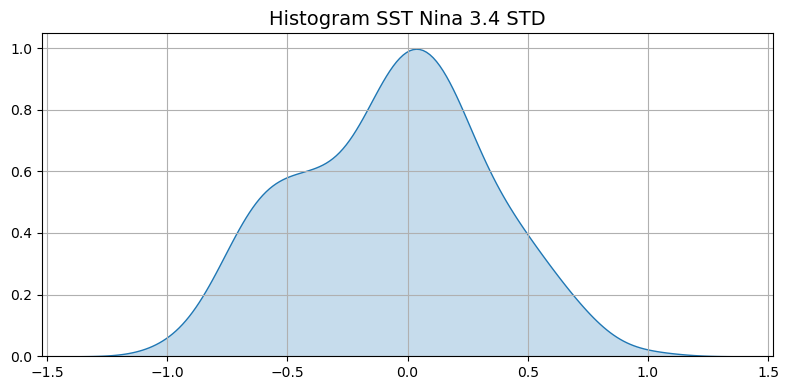

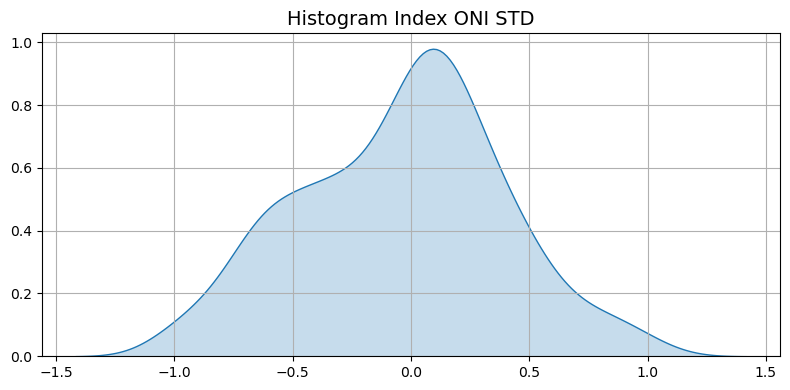

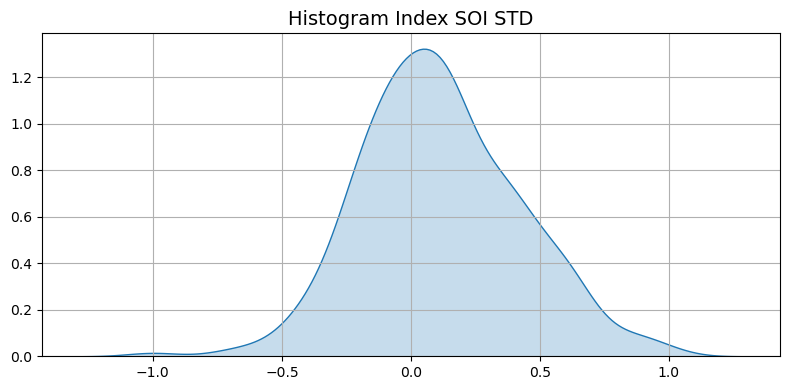

In [14]:
histogram(
  data=scaled, x="sst_std",
  title="Histogram SST Nina 3.4 STD"
)

histogram(
  data=scaled, x="oni_std",
  title="Histogram Index ONI STD"
)

histogram(
  data=scaled, x="soi_std",
  title="Histogram Index SOI STD"
)

3. Heatmap Correlations

In [15]:
def heatmap(data, title):
  # create heatmap corr
  fig, ax = plt.subplots(figsize=(8,4))
  sns.heatmap(data=data, vmin=-1, vmax=1,cmap="viridis", annot=True, fmt=".3f", linewidths=1)

  # set labels
  ax.set_title(title, fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(False)

  # show plot
  plt.tight_layout()
  plt.show()

In [16]:
# corr kendall
kendall = scaled.corr(method="kendall")

In [17]:
# corr spearman
spearman = scaled.corr(method="spearman")

In [18]:
# corr pearson
pearson = scaled.corr(method="pearson")

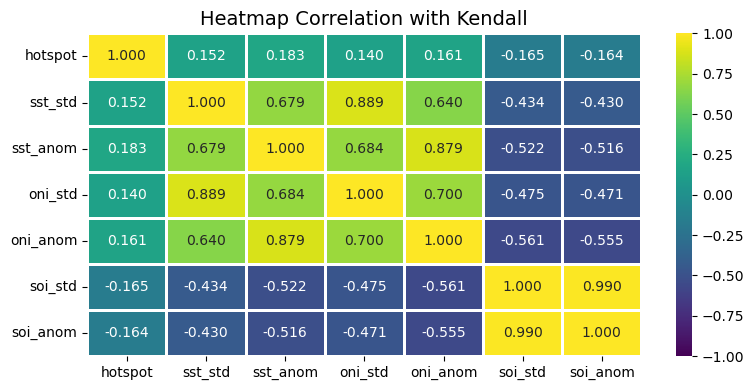

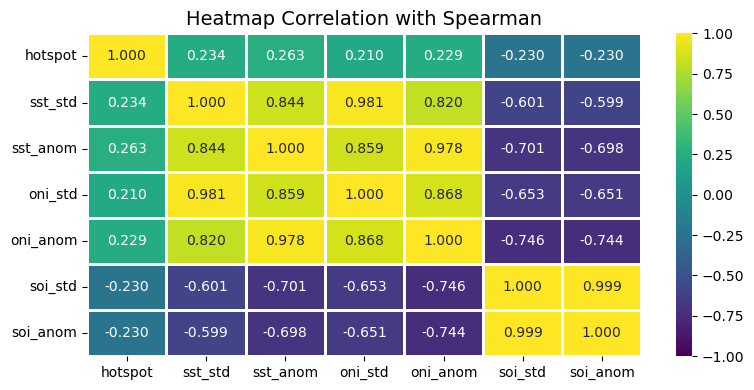

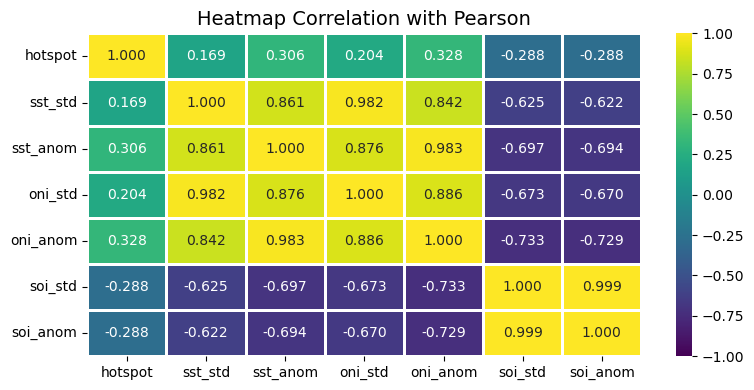

In [19]:
# call func heatmap
heatmap(kendall, "Heatmap Correlation with Kendall")
heatmap(spearman, "Heatmap Correlation with Spearman")
heatmap(pearson, "Heatmap Correlation with Pearson")

4. Boxplot

In [20]:
def boxplot(data, labels, title):
  # define boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.boxplot(x=data, labels=labels, widths=(0.75, 0.75, 0.75, 0.75), patch_artist=True)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.grid(True)

  # show boxplot
  plt.tight_layout()
  plt.show()

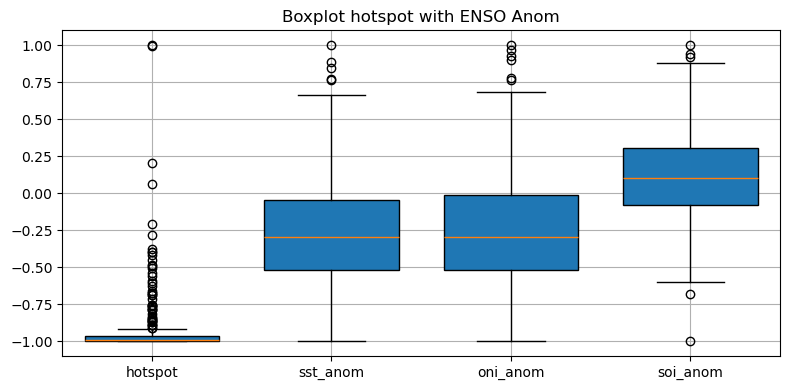

In [21]:
boxplot(
  data=scaled[["hotspot", "sst_anom", "oni_anom", "soi_anom"]],
  labels=["hotspot", "sst_anom", "oni_anom", "soi_anom"],
  title="Boxplot hotspot with ENSO Anom"
)

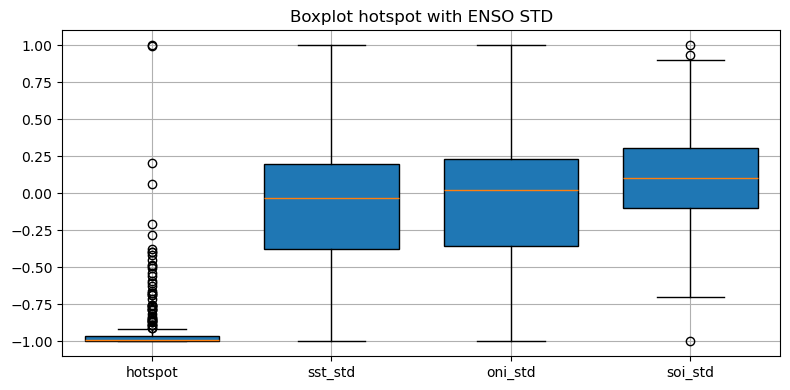

In [22]:
boxplot(
  data=scaled[["hotspot", "sst_std", "oni_std", "soi_std"]],
  labels=["hotspot", "sst_std", "oni_std", "soi_std"],
  title="Boxplot hotspot with ENSO STD"
)